In [1]:
import os.path
import pandas as pd
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [2]:
def read_file(file_path):
    df = pd.read_csv('data/steam_reviews.csv')
    filtered_df = df[df['helpful'] > 0]
    df_list = list(filtered_df['review'].astype(str))
    return df_list

["&gt Played as German Reich&gt Declare war on Belgium&gt Can't break Belgium so go through France&gt Capitulate France in order to get to Belgium&gt Get True Blitzkrieg achievementThis game is dad",
 "Out of all the reviews I wrote This one is probably the most serious one I wrote. For starters the community of this game sucks just like every online game You don't wanna talk to them because they're all just jerks who wanna say you suck or you camped or blah blah blah its rare to get a nice compliment out of people in this game.But you don't have to talk to the community either. Unlike most online games this one doesn't have a mic system so you don't have to worry about hearing a twelve year old cry baby raging at you for nothing. Only time you can talk to people in the game is in the beginning before the match starts if your a survivor and at the end after the match is over as both killer and survivor The end chat is the only one the killer can talk to everyone in the match though. Mo

In [26]:
def preprocess_data(df_list):
    tokenizer = RegexpTokenizer(r'\b\w{3,}\b')
    en_stop = set(stopwords.words('english'))
    p_stemmer = PorterStemmer()

    output = []
    for i in df_list:
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        stopped_tokens = [i for i in tokens if not i in en_stop]
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        output.append(stemmed_tokens)

    return output

df_clean = preprocess_data(df_list)

In [9]:
def prepare_corpus(df_clean):
    dictionary = corpora.Dictionary(df_clean)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in df_clean]
    return dictionary, doc_term_matrix

In [10]:
def create_gensim_lsa(df_clean, number_of_topics, words):
    dictionary, doc_term_matrix = prepare_corpus(df_clean)
    lsa = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)
    return lsa

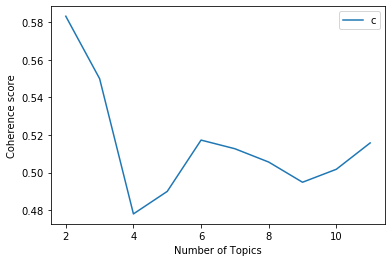

In [13]:
def def_coherence_values(dictionary, doc_term_matrix, df_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=df_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

def plot(df_clean, start, stop, step):
    dictionary, doc_term_matrix = prepare_corpus(df_clean)
    model_list, coherence_values = def_coherence_values(dictionary, doc_term_matrix, df_clean, stop, start, step)

    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

start, stop, step = 2, 12, 1
plot(df_clean, start, stop, step)

In [27]:
number_of_topics = 2
words = 8
clean_text = preprocess_data(df_list)
model = create_gensim_lsa(clean_text, number_of_topics, words)

model.print_topics(num_topics=number_of_topics, num_words=words)

[(0,
  '1.000*"ye" + 0.000*"game" + 0.000*"play" + 0.000*"get" + 0.000*"like" + 0.000*"notmygta" + 0.000*"peopl" + 0.000*"time"'),
 (1,
  '1.000*"realli" + 0.007*"game" + 0.002*"notmygta" + 0.002*"updat" + 0.002*"play" + 0.002*"get" + 0.002*"like" + 0.001*"bad"')]